94% Accuracy / 98% ROC by not removing missing values! Drastic improvement from 83% Accuracy / 82% ROC

In [41]:
import pandas as pd


df_og = pd.read_csv('/Users/scoobydoo/Downloads/hmda_2017_ga_all-records_labels.csv')

df_og.head()

/var/folders/ht/hhf4j5yn3jn05l8qsbft6x3m0000gn/T/ipykernel_82526/3169991318.py:4: DtypeWarning: Columns (34,36,38,44,46,48,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv('/Users/scoobydoo/Downloads/hmda_2017_ga_all-records_labels.csv')


,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,38-2750395,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,6412.0,55.320000,69200.0,75.160004,1588.0,2164.0,NaN
1,2017,54-1094297,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,0000012079,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,2415.0,53.369999,45900.0,142.070007,557.0,799.0,NaN
3,2017,22-3039688,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,5180.0,37.970001,53400.0,113.639999,1510.0,2599.0,NaN
4,2017,59-1515932,Department of Housing and Urban Development,HUD,7,Conventional,1,Manufactured housing,2,Home purchase,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
total_cells = df_og.size

#total missing cells
total_missing = df_og.isnull().sum().sum()

#percentage of cells that are missing
percentage_missing = (total_missing / total_cells) * 100

print(f"Total cells in dataset: {total_cells}")
print(f"Total missing values: {total_missing}")
print(f"Percentage of missing values: {percentage_missing:.2f}%")

Total cells in dataset: 39102180
Total missing values: 13605075
Percentage of missing values: 34.79%


In [43]:
missing_percentage = df_og.isnull().mean()*100

pd.set_option('display.max_rows', None)

print("\nPercentage of NaN values in each column:")
print(missing_percentage)




Percentage of NaN values in each column:
as_of_year                          0.000000
respondent_id                       0.000000
agency_name                         0.000000
agency_abbr                         0.000000
agency_code                         0.000000
loan_type_name                      0.000000
loan_type                           0.000000
property_type_name                  0.000000
property_type                       0.000000
loan_purpose_name                   0.000000
loan_purpose                        0.000000
owner_occupancy_name                0.000000
owner_occupancy                     0.000000
loan_amount_000s                    0.000000
preapproval_name                    0.000000
preapproval                         0.000000
action_taken_name                   0.000000
action_taken                        0.000000
msamd_name                         12.110870
msamd                              12.103688
state_name                          0.000000
state_abbr   

In [ ]:
print(df_og['purchaser_type_name'])

In [26]:
columns_to_drop = missing_percentage[missing_percentage > 10.0].index

df = df_og.drop(columns=columns_to_drop)

print(df.head())

   as_of_year respondent_id                                  agency_name  \
0        2017    38-2750395  Department of Housing and Urban Development   
1        2017    54-1094297  Department of Housing and Urban Development   
2        2017    0000012079        Federal Deposit Insurance Corporation   
3        2017    22-3039688  Department of Housing and Urban Development   
4        2017    59-1515932  Department of Housing and Urban Development   

  agency_abbr  agency_code loan_type_name  loan_type  \
0         HUD            7   Conventional          1   
1         HUD            7   Conventional          1   
2        FDIC            3   Conventional          1   
3         HUD            7    FHA-insured          2   
4         HUD            7   Conventional          1   

                                  property_type_name  property_type  \
0  One-to-four family dwelling (other than manufa...              1   
1  One-to-four family dwelling (other than manufa...            

In [27]:
missing_percentage = df.isnull().mean()*100

pd.set_option('display.max_rows', None)

print("\nPercentage of NaN values in each column:")
print(missing_percentage)



Percentage of NaN values in each column:
as_of_year                        0.000000
respondent_id                     0.000000
agency_name                       0.000000
agency_abbr                       0.000000
agency_code                       0.000000
loan_type_name                    0.000000
loan_type                         0.000000
property_type_name                0.000000
property_type                     0.000000
loan_purpose_name                 0.000000
loan_purpose                      0.000000
owner_occupancy_name              0.000000
owner_occupancy                   0.000000
loan_amount_000s                  0.000000
preapproval_name                  0.000000
preapproval                       0.000000
action_taken_name                 0.000000
action_taken                      0.000000
state_name                        0.000000
state_abbr                        0.000000
state_code                        0.000000
county_name                       0.205262
county_code 

In [ ]:
print(df['agency_name'])

In [ ]:
print(df['action_taken_name'])

In [28]:
unique_values = df['action_taken_name'].unique()
print(unique_values)

['Loan originated' 'Application denied by financial institution'
 'Application withdrawn by applicant' 'File closed for incompleteness'
 'Application approved but not accepted'
 'Loan purchased by the institution'
 'Preapproval request denied by financial institution'
 'Preapproval request approved but not accepted']


In [29]:
per_d = df['action_taken_name'].value_counts(normalize=True)*100
print(per_d)

action_taken_name
Loan originated                                        48.818296
Application denied by financial institution            15.560033
Loan purchased by the institution                      15.339411
Application withdrawn by applicant                     12.741218
File closed for incompleteness                          4.957013
Application approved but not accepted                   2.577846
Preapproval request denied by financial institution     0.004987
Preapproval request approved but not accepted           0.001197
Name: proportion, dtype: float64


In [30]:
unique_values = df['action_taken'].unique()
print(unique_values)

[1 3 4 5 2 6 7 8]


In [31]:
columns_to_remove = [
    'respondent_id', 'agency_name', 'agency_abbr', 'agency_code',
    'state_abbr', 'state_code', 'purchaser_type_name', 'purchaser_type'
]

df.drop(columns = columns_to_remove, inplace = True)

columns_to_keep = [column for column in df.columns if 'name' not in column.lower()]

df = df[columns_to_keep]

print("remaining columns:", df.columns)


remaining columns: Index(['as_of_year', 'loan_type', 'property_type', 'loan_purpose',
       'owner_occupancy', 'loan_amount_000s', 'preapproval', 'action_taken',
       'county_code', 'census_tract_number', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_race_1', 'co_applicant_race_1',
       'applicant_sex', 'co_applicant_sex', 'hoepa_status', 'lien_status',
       'population', 'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units'],
      dtype='object')


In [44]:
columns_to_remove = [
    'respondent_id', 'agency_name', 'agency_abbr', 'agency_code',
    'state_abbr', 'state_code', 'purchaser_type_name', 'purchaser_type'
]

df_og.drop(columns = columns_to_remove, inplace = True)

columns_to_keep = [column for column in df_og.columns if 'name' not in column.lower()]

df_og = df_og[columns_to_keep]

print("remaining columns:", df_og.columns)

remaining columns: Index(['as_of_year', 'loan_type', 'property_type', 'loan_purpose',
       'owner_occupancy', 'loan_amount_000s', 'preapproval', 'action_taken',
       'msamd', 'county_code', 'census_tract_number', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_race_1', 'applicant_race_2',
       'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
       'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3',
       'co_applicant_race_4', 'co_applicant_race_5', 'applicant_sex',
       'co_applicant_sex', 'applicant_income_000s', 'denial_reason_1',
       'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status',
       'lien_status', 'edit_status', 'sequence_number', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator'],
      dtype='object')


In [32]:
def map_approval(action):
    if action in [1,6]:
        return 1
    elif action in [3,7]: 
        return 0
    else: 
        return None
    
df['loan_approval'] = df['action_taken'].apply(map_approval)

df = df.dropna(subset = ['loan_approval'])

df['loan_approval'] = df['loan_approval'].astype(int)

print(df.head())



   as_of_year  loan_type  property_type  loan_purpose  owner_occupancy  \
0        2017          1              1             1                1   
1        2017          1              1             1                1   
2        2017          1              1             1                1   
3        2017          2              1             3                1   
4        2017          1              2             1                1   

   loan_amount_000s  preapproval  action_taken  county_code  \
0               244            3             1         89.0   
1               159            3             1          NaN   
2               256            3             1        185.0   
3               157            3             1        145.0   
4                64            3             3          NaN   

   census_tract_number  ...  co_applicant_sex  hoepa_status  lien_status  \
0               218.05  ...                 2             2            1   
1                  NaN  

In [45]:
def map_approval(action):
    if action in [1,6]:
        return 1
    elif action in [3,7]: 
        return 0
    else: 
        return None
    
df_og['loan_approval'] = df_og['action_taken'].apply(map_approval)

df_og2 = df_og.dropna(subset = ['loan_approval'])

df_og2['loan_approval'] = df_og2['loan_approval'].astype(int)

print(df_og2.head())

   as_of_year  loan_type  property_type  loan_purpose  owner_occupancy  \
0        2017          1              1             1                1   
1        2017          1              1             1                1   
2        2017          1              1             1                1   
3        2017          2              1             3                1   
4        2017          1              2             1                1   

   loan_amount_000s  preapproval  action_taken    msamd  county_code  ...  \
0               244            3             1  12060.0         89.0  ...   
1               159            3             1      NaN          NaN  ...   
2               256            3             1  46660.0        185.0  ...   
3               157            3             1  17980.0        145.0  ...   
4                64            3             3      NaN          NaN  ...   

   edit_status  sequence_number  population  minority_population  \
0          NaN          

/var/folders/ht/hhf4j5yn3jn05l8qsbft6x3m0000gn/T/ipykernel_82526/2003112383.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_og2['loan_approval'] = df_og2['loan_approval'].astype(int)


In [49]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler




def map_approval(action):
    if action in [1,6]:  # Loan originated or application approved but not accepted
        return 1
    elif action in [3,7]:  # Application denied or preapproval request denied
        return 0
    return None

# Apply the function to the dataset
df['loan_approval'] = df['action_taken'].apply(map_approval)
df = df.dropna(subset=['loan_approval'])  # Drop rows with None
df['loan_approval'] = df['loan_approval'].astype(int)

df = df.dropna()


X = df.drop(['loan_approval', 'action_taken'], axis=1)  # drop target and original action_taken column
y = df['loan_approval']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weights = y_train.value_counts(normalize=True)
class_weight = {0: 1 / weights[0], 1: 1 / weights[1]}


model = lgb.LGBMClassifier(
    num_leaves=30, 
    learning_rate=0.07, 
    n_estimators=100
)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] 


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


[LightGBM] [Info] Number of positive: 224755, number of negative: 53545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 278300, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.807600 -> initscore=1.434488
[LightGBM] [Info] Start training from score 1.434488
Accuracy: 0.83
ROC AUC: 0.82


In [50]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Function to map action_taken to approval status
def map_approval(action):
    if action in [1, 6]:  # Loan originated or application approved but not accepted
        return 1
    elif action in [3, 7]:  # Application denied or preapproval request denied
        return 0
    return -1  # Default category for any other or missing actions

# Apply the function to the dataset and handle missing data
df_og2['loan_approval'] = df_og2['action_taken'].apply(map_approval)
df_og2['loan_approval'] = df_og2['loan_approval'].replace(-1, pd.NA)  # Handle undefined actions
df_og2.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

# Encode categorical data and prepare features
X = df_og2.drop(['loan_approval', 'action_taken'], axis=1)  # Drop the target and original action_taken column
y = df_og2['loan_approval']
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust class weights based on training data
weights = y_train.value_counts(normalize=True)
class_weight = {0: 1 / weights[0], 1: 1 / weights[1]}

# Train the LightGBM model
model = lgb.LGBMClassifier(num_leaves=30, learning_rate=0.07, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Predictions and evaluations
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


/var/folders/ht/hhf4j5yn3jn05l8qsbft6x3m0000gn/T/ipykernel_82526/2876398471.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_og2['loan_approval'] = df_og2['action_taken'].apply(map_approval)
/var/folders/ht/hhf4j5yn3jn05l8qsbft6x3m0000gn/T/ipykernel_82526/2876398471.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_og2['loan_approval'] = df_og2['loan_approval'].replace(-1, pd.NA)  # Handle undefined actions
/var/folders/ht/hhf4j5yn3jn05l8qsbft6x3m0000gn/T/ipykernel_82526/2876398471.py:18: Futur

[LightGBM] [Info] Number of positive: 225291, number of negative: 54469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2622
[LightGBM] [Info] Number of data points in the train set: 279760, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.805301 -> initscore=1.419761
[LightGBM] [Info] Start training from score 1.419761
Accuracy: 0.94
ROC AUC: 0.98
Confusion Matrix:
[[17911  5649]
 [ 1530 94808]]


In [47]:
import numpy as np


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


custom_threshold = 0.7  


y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)


accuracy_custom_threshold = accuracy_score(y_test, y_pred_custom_threshold)
roc_auc_custom_threshold = roc_auc_score(y_test, y_pred_proba)  

print(f"Accuracy with custom threshold {custom_threshold}: {accuracy_custom_threshold:.2f}")
print(f"ROC AUC: {roc_auc_custom_threshold:.2f}")


Accuracy with custom threshold 0.7: 0.94
ROC AUC: 0.98


In [303]:
import numpy as np


y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


custom_threshold = 0.7  


y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)


accuracy_custom_threshold = accuracy_score(y_test, y_pred_custom_threshold)
roc_auc_custom_threshold = roc_auc_score(y_test, y_pred_proba)  

print(f"Accuracy with custom threshold {custom_threshold}: {accuracy_custom_threshold:.2f}")
print(f"ROC AUC: {roc_auc_custom_threshold:.2f}")


Accuracy with custom threshold 0.7: 0.79
ROC AUC: 0.81


In [269]:

important_features = [
    'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
    'loan_amount_000s', 'applicant_ethnicity', 'applicant_race_1', 
    'applicant_sex', 'co_applicant_sex', 'hoepa_status', 'lien_status',
    'hud_median_family_income', 'tract_to_msamd_income'
]


X_important = df[important_features]


X_important_encoded = pd.get_dummies(X_important, drop_first=True)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important_encoded, df['loan_approval'], test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_imp_scaled = scaler.fit_transform(X_train_imp)
X_test_imp_scaled = scaler.transform(X_test_imp)


model = lgb.LGBMClassifier(
    num_leaves=100, 
    learning_rate=0.5, 
    n_estimators=10
)
model.fit(X_train_imp_scaled, y_train_imp)


y_pred_imp = model.predict(X_test_imp_scaled)
y_pred_proba_imp = model.predict_proba(X_test_imp_scaled)[:, 1]


accuracy_imp = accuracy_score(y_test_imp, y_pred_imp)
roc_auc_imp = roc_auc_score(y_test_imp, y_pred_proba_imp)
print(f"Accuracy with important features: {accuracy_imp:.2f}")
print(f"ROC AUC with important features: {roc_auc_imp:.2f}")


[LightGBM] [Info] Number of positive: 224755, number of negative: 53545
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 278300, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.807600 -> initscore=1.434488
[LightGBM] [Info] Start training from score 1.434488
Accuracy with important features: 0.83
ROC AUC with important features: 0.81


In [354]:
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler


X = df.drop(['loan_approval', 'action_taken'], axis=1)  
y = df['loan_approval']


X_encoded = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


model_params = {
    'num_leaves': 30, 
    'learning_rate': 0.07, 
    'n_estimators': 100,
    'class_weight': 'balanced'
}


model = lgb.LGBMClassifier(**model_params)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


scoring = {'accuracy': 'accuracy', 
           'roc_auc': 'roc_auc'}


cv_results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=False)

print("CV Accuracy Scores:", cv_results['test_accuracy'])
print("Mean CV Accuracy:", np.mean(cv_results['test_accuracy']))
print("CV ROC AUC Scores:", cv_results['test_roc_auc'])
print("Mean CV ROC AUC:", np.mean(cv_results['test_roc_auc']))


[LightGBM] [Info] Number of positive: 256924, number of negative: 61133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 318057, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 257185, number of negative: 60872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 318057, number of used features: 22
[LightGBM] [Info

In [270]:
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['loan_approval', 'action_taken'], axis=1)  
y = df['loan_approval']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=10, 
    min_samples_split=5
)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.83
ROC AUC: 0.81


In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



X = df_og2.drop(['loan_approval', 'action_taken'], axis=1)  
y = df_og2['loan_approval']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [131]:
baseline_accuracy = df['loan_approval'].mean() if df['loan_approval'].mean() > 0.5 else 1 - df['loan_approval'].mean()
print(f"Baseline Model Accuracy: {baseline_accuracy:.2f}")


Baseline Model Accuracy: 0.81


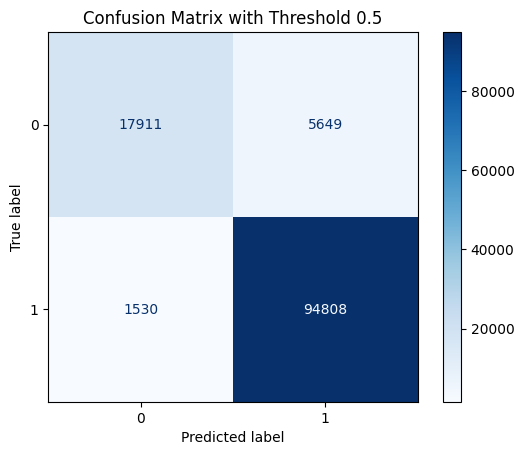

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_scaled)  

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix with Threshold 0.5')
plt.show()


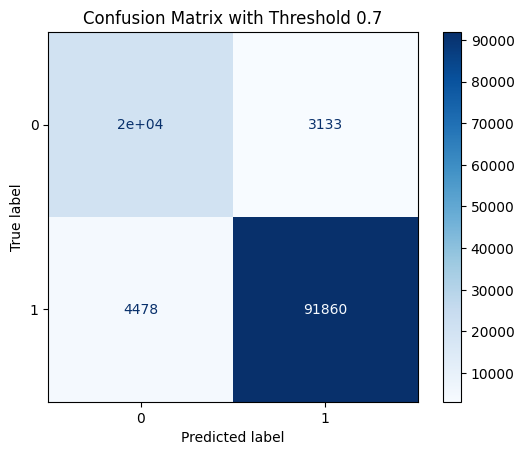

In [52]:
custom_threshold = 0.7 

y_pred_custom_threshold = (y_pred_proba >= custom_threshold).astype(int)

cm_custom_threshold = confusion_matrix(y_test, y_pred_custom_threshold)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_custom_threshold)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix with Threshold {custom_threshold}')
plt.show()


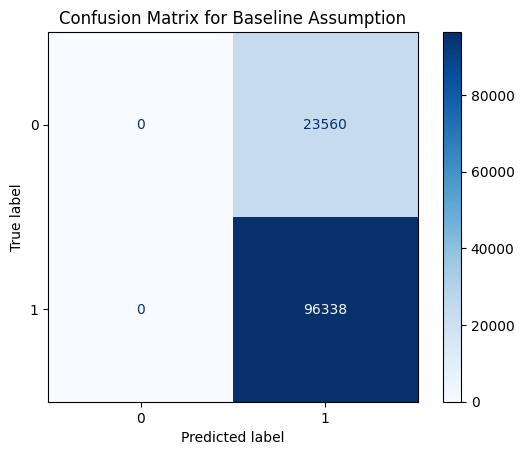

In [53]:
y_pred_baseline = np.ones(y_test.shape, dtype=int)

cm_baseline = confusion_matrix(y_test, y_pred_baseline)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Baseline Assumption')
plt.show()

In [294]:
print(df.columns)

Index(['as_of_year', 'loan_type', 'property_type', 'loan_purpose',
       'owner_occupancy', 'loan_amount_000s', 'preapproval', 'action_taken',
       'county_code', 'census_tract_number', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_race_1', 'co_applicant_race_1',
       'applicant_sex', 'co_applicant_sex', 'hoepa_status', 'lien_status',
       'population', 'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_approval'],
      dtype='object')


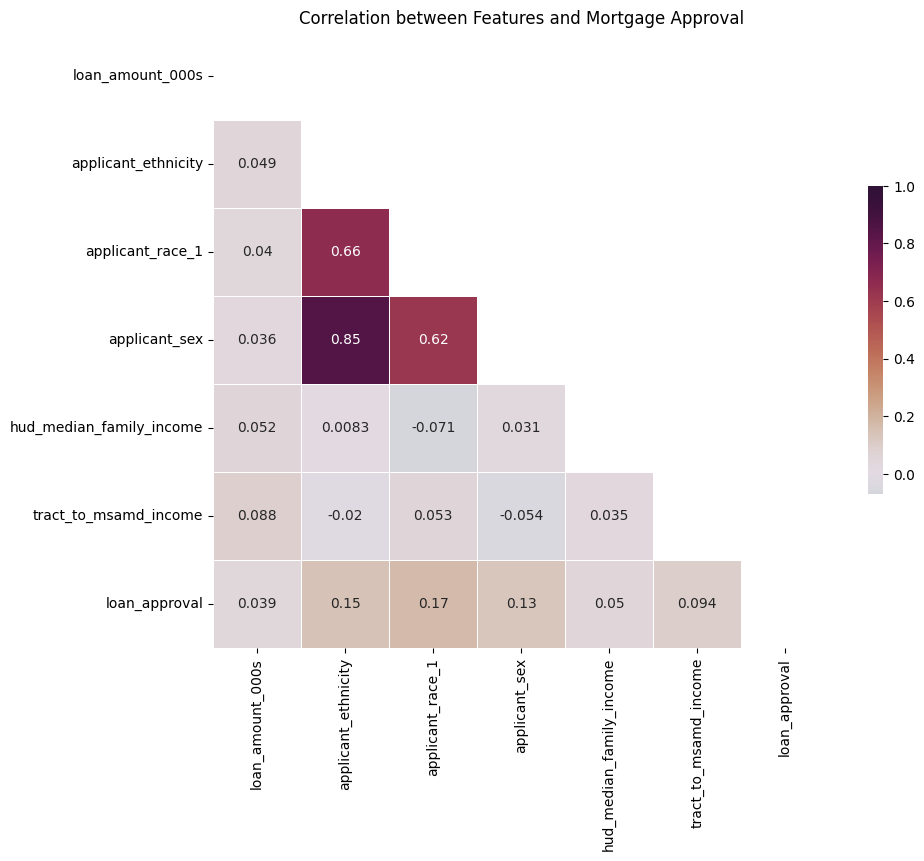

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt


features_to_check = [
    'loan_amount_000s', 'applicant_ethnicity', 'applicant_race_1', 
    'applicant_sex', 'hud_median_family_income', 'tract_to_msamd_income', 'loan_approval'
]


correlation_matrix = df[features_to_check].corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, mask=mask, cmap='twilight_shifted', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation between Features and Mortgage Approval')
plt.show()


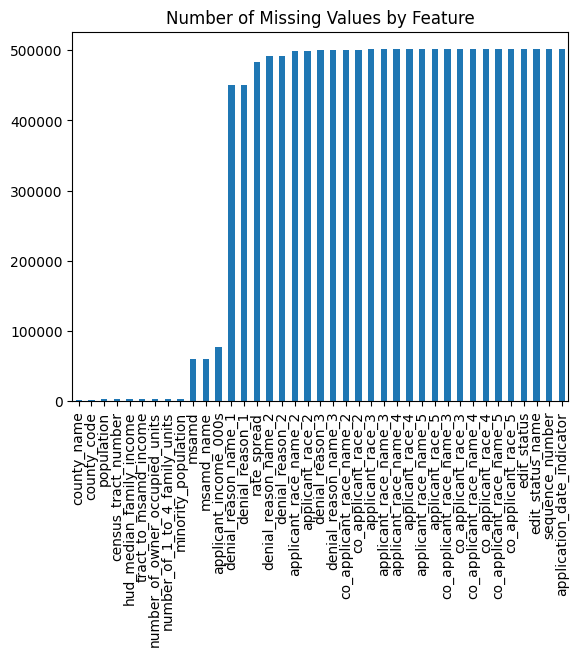

In [337]:
missing = df_og.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)


missing.plot.bar()
plt.title('Number of Missing Values by Feature')
plt.show()

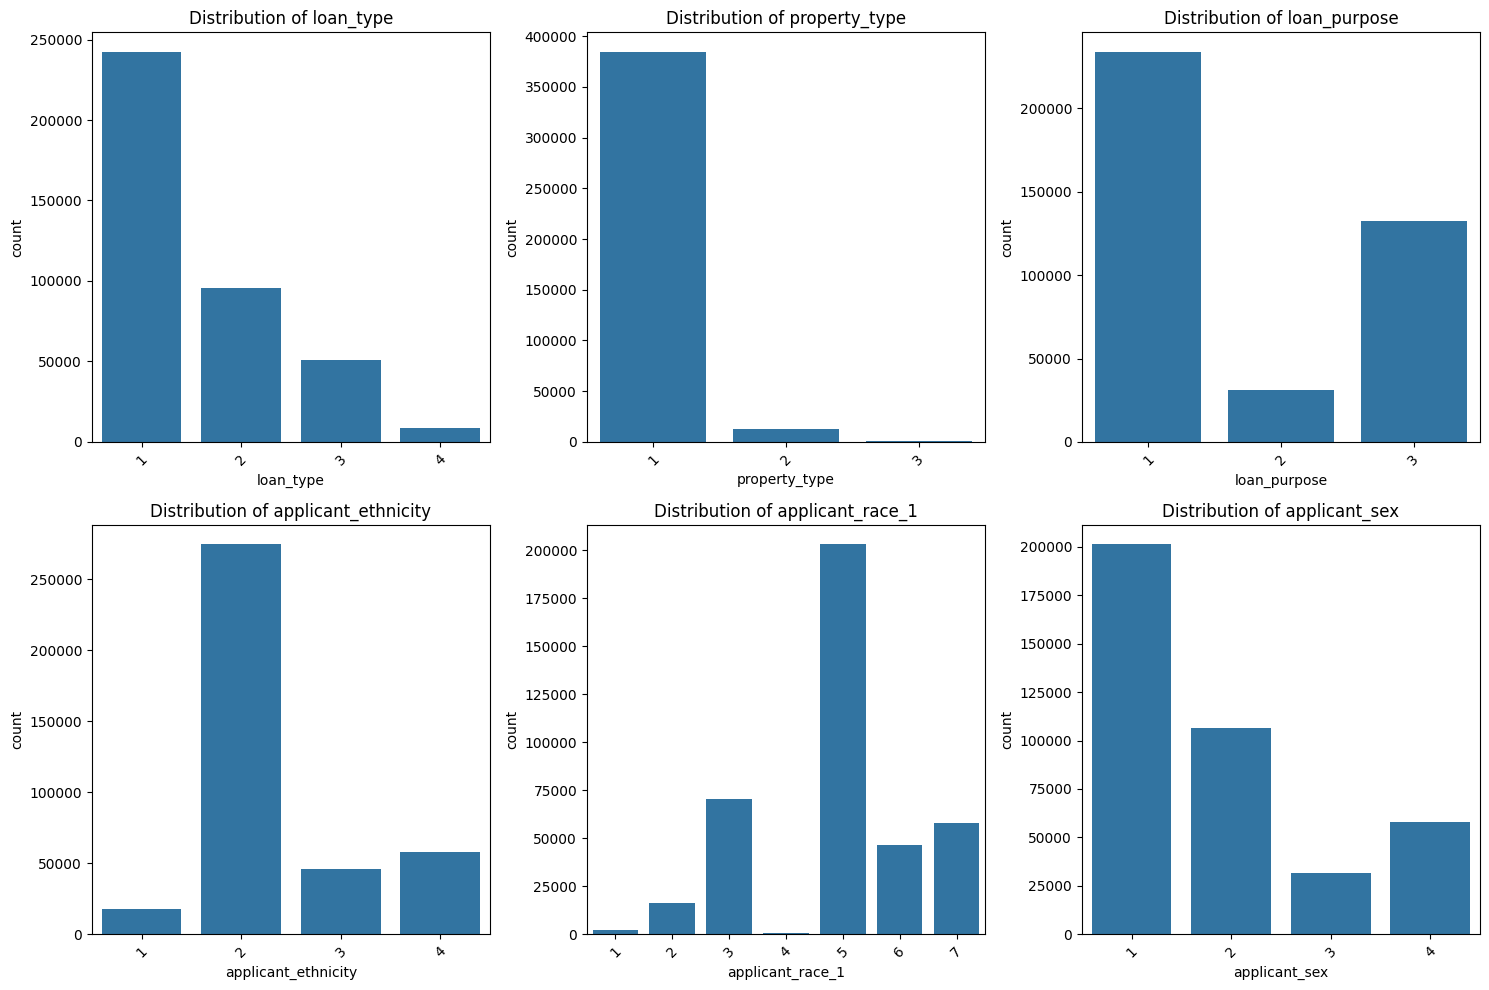

In [340]:

categorical_features = ['loan_type', 'property_type', 'loan_purpose', 'applicant_ethnicity', 'applicant_race_1', 'applicant_sex']


plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)  
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

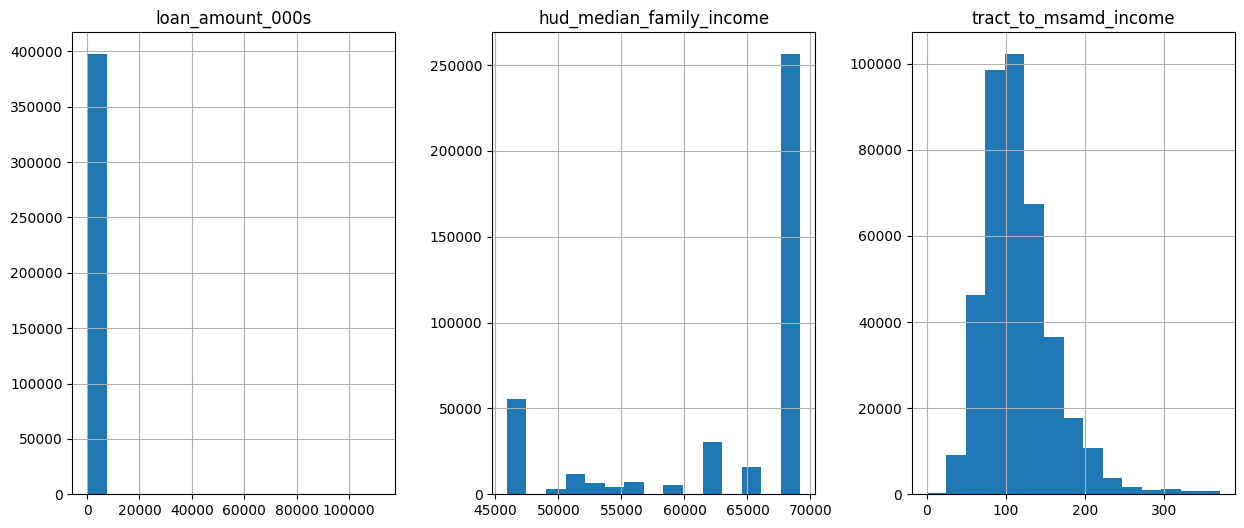

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_features = ['loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']


df[numeric_features].hist(bins=15, figsize=(15, 6), layout=(1, len(numeric_features)))
plt.show()